# ECO-3IO-PCEX (ECO3IOPC)

Model ECO-30IO-PCEX was introduced by Marco Veronese Passarella as a simple pedagogical environmentally extended stock-flow consistent (SFC) input-output (IO) model (see the [source repository](https://github.com/marcoverpas/keynote_speech_Florence/blob/main/README.md#21---model-pc)). This implementation by Karl Naumann-Woleske extends the model to use the expectation version of model PC.

## Model Overview

The remainder of this page gives an introduction to the model, notes on how it is implemented in `MacroStat` and then shows some of the model dynamics using the default parameters. 

1. Carbon Mass Nonrenewable Energy

The carbon mass of non-renewable energy is given by the conversion
of emissions (due to non-renewable energy) with a fixed constant

$$
	\begin{align}
	cen(t) &= \frac{emis(t)}{car}
	\end{align}
$$



2. Central Bank Bill Holdings
$$
	\begin{align}
	B_{CB}(t) = B_{s}(t) - B_{h}(t)
	\end{align}
$$



3. Central Bank Money Stock
$$
	\begin{align}
	H_{s}(t) = H_{s}(t-1) + (B_{CB}(t) - B_{CB}(t-1))
	\end{align}
$$



4. Central Bank Profits
$$
	\begin{align}
	r(t-1)B_{CB}(t-1)
	\end{align}
$$



5. Co2 Intensity Change

The energy emission intensity decreases by a fixed percentage
each period

$$
	\begin{align}
	\beta_e(t) = \beta_e(t-1) (1 - \Delta_\% \beta_e)
	\end{align}
$$



6. Consumption (including the inflation term to adjust for the decrease in value of savings)

$$
	\begin{align}
	c(t) = \alpha_1 \left(\frac{YD^e(t)}{p_c(t)} - \pi(t)\right) + \alpha_2 \frac{V(t-1)}{p_c(t)}
	\end{align}
$$



7. Cumulative Co2 Emissions

Cumulative CO2 emissions are simply incremented by the current
emissions

$$
	\begin{align}
	co2_{cum}(t) = co2_{cum}(t-1) + emis(t)
	\end{align}
$$



8. Discarding Of Socioeconomic Stock

The discarding of socioeconomic stock occurs as a percentage of
existing stock, converted into units of matter

$$
	\begin{align}
	dis(t) &= m_{mat}^\top (\zeta \cdot dc(t-1))
	\end{align}
$$



9. Disposable Income

$$
	\begin{align}
	YD(t) = Y(t) - T(t) + r(t-1)B_h(t-1)
	\end{align}
$$


10. Emissions From Nonrenewable Energy

Emissions are based on the use of non-renewable energy, with a fixed
emission intensity

$$
	\begin{align}
	emis(t) = \beta_e nen(t)
	\end{align}
$$



11. Energy Reserves

Energy reserves are depleted by human use and incremented by the
conversion from resources

$$
	\begin{align}
	k_e(t) &= k_e(t-1) + conv_e(t) - mat(t)
	\end{align}
$$



12. Energy To Resource Conversion

Energy resources are converted into reserves at a fixed rate

$$
	\begin{align}
	res_e(t) &= res_e(t-1) - conv_e(t)\\
	conv_e(t) &= \sigma_e res_e(t)
	\end{align}
$$



13. Energy Used In Production

Energy use in production is given by a fixed energy intensity of
production

$$
	\begin{align}
	en(t) = \epsilon_e^\top x(t)
	\end{align}
$$



14. Expected Disposable Income

The expected disposable income is simply the prior period's
disposable income. Equation (3.20) in the book.

$$
	\begin{align}
	YD^e(t) = YD(t-1)
	\end{align}
$$



15. Expected Wealth

$$
	\begin{align}
	V^e(t) = V(t-1) + YD^e(t) - C(t)
	\end{align}
$$



16. Extraction Of Matter

The matter extracted is the difference in the matter consumed and
the matter that was recycled

$$
	\begin{align}
	mat(t) &= x_{mat} - rec(t)
	\end{align}
$$



17. Final Demand

Calculate the final demand as the sum of household and government
demands spread over the sectors

$$
	\begin{align}
	d_i(t) = \beta_{HH,i}C_{HH}(t) + \beta_{GOV,i}G(t)
	\end{align}
$$



18. Government Bill Issuance

$$
	\begin{align}
	B_s(t) = B_s(t-1) + (G(t) - r(t-1)B_s(t-1)) - (T(t) + r(t-1)B_{CB}(t-1))
	\end{align}
$$



19. Household Bill Demand

$$
	\begin{align}
	\frac{B_h(t)}{V^e(t)} = \lambda_0 + \lambda_1 r(t) - \lambda_2 \frac{YD^e(t)}{V^e(t)}
	\end{align}
$$



20. Household Bill Holdings

$$
	\begin{align}
	B_h(t) = B_h(t-1) + (B_h^d(t) - B_h(t-1))
	\end{align}
$$



21. Household Money Stock

Calculate the household deposits as a residual.

$$
	\begin{align}
	H_h(t) = V(t) - B_h(t)
	\end{align}
$$



22. Inflation

Compute the inflation (i.e. term for absence of money illusion)

$$
	\begin{align}
	\pi(t) &= \left(\frac{p_c(t) - p_c(t-1)}{p_c(t-1)}\right)\left(\frac{V(t-1)}{p_c(t-1)}\right)
	\end{align}
$$



23. Interest Earned On Bills Household

Calculate the interest earned on bills by the household.

$$
	\begin{align}
	r(t-1)B_h(t-1)
	\end{align}
$$



24. Material Goods Production

The material goods production in the economy

$$
	\begin{align}
	x_{mat}(t) &= m_{mat}^\top x(t)
	\end{align}
$$



25. Matter Reserves

Matter reserves are depleted by human use and incremented by the
conversion from resources

$$
	\begin{align}
	k_m(t) &= k_m(t-1) + conv_m(t) - mat(t)
	\end{align}
$$



26. Matter To Resource Conversion

Matter resources is converted into reserves at a fixed rate

$$
	\begin{align}
	res(t) &= res(t-1) - conv_m(t)\\
	conv_m(t) &= \sigma_m res(t)
	\end{align}
$$



27. National Income

National income is the sum of nominal final demand

$$
	\begin{align}
	Y(t) = P^\top(t)d(t)
	\end{align}
$$



28. Non Renewable Energy Used In Production

Non-renewable energy use in production is given by the difference in
energy used and renewable energy used.

$$
	\begin{align}
	nen(t) = en(t) - ren(t)
	\end{align}
$$



29. Oxygen

The oxygen level is given by the difference in emissions and the
carbon mass of energy

$$
	\begin{align}
	o2(t) &= emis(t) - cen(t)
	\end{align}
$$


30. Price Indices

Compute the consumer and government price indices based on their
consumption shares

$$
	\begin{align}
	p_c(t) &= \beta_{HH}^\top P(t)\\
	p_g(t) &= \beta_{G}^\top P(t)
	\end{align}
$$



31. Prices

Compute the sectoral prices as the sum of unit labour cost and a
markup on intermediate prices

$$
	\begin{align}
	P_i(t) = \frac{w}{pr_i} + (1 + \mu)\sum_j a_{ij}P_j(t)
	\end{align}
$$



32. Propensity To Consume Income

Endogenous propensity to consume out of income, dependent on the
rate of interest

$$
	\begin{align}
	\alpha_1(t) = \alpha_{10} - \alpha_{11} r(t-1)
	\end{align}
$$



33. Real Gross Output

Compute real gross output as the solution to the linear set of
equations

$$
	\begin{align}
	x(t) = (I - A)^{-1}d(t)
	\end{align}
$$



34. Recycling Of Discarded Stock

A fixed share of the discarded socioeconomic stock is recycled

$$
	\begin{align}
	rec(t) &= \rho_{dis} dis(t)
	\end{align}
$$



35. Renewable Energy Used In Production

Renewable energy use in production is given by a fixed energy intensity of
production combined with a fixed share of energy sourced from renewables

$$
	\begin{align}
	ren(t) = \epsilon_e^\top (\eta_{en} \cdot x(t))
	\end{align}
$$



36. Set Interest Rate

Set the interest rate. This is given exogenously by the scenario.

$$
	\begin{align}
	r(t) = \bar{r}
	\end{align)
	\end{align}
$$



37. Socioeconomic Stock

The socioeconomic stock grows through material extraction and
shrinks due to discards

$$
	\begin{align}
	k_h(t) &= k_h(t-1) + x_{mat}(t) - dis(t)
	\end{align}
$$



38. Stock Of Durable Goods

The stock of durable goods evolves based on inflows from consumption
and outflows from discard

$$
	\begin{align}
	dc(t) &= dc(t-1) + B_c c(t) - \zeta dc(t-1)
	\end{align}
$$



39. Taxes

Calculate the taxes.

$$
	\begin{align}
	T(t) = \theta (Y(t) + r(t-1)B_h(t-1))
	\end{align}
$$



40. Temperature

Temperature is determined by a transformation of cumulative CO2

$$
	\begin{align}
	temp(t) = \frac{1}{1-fnc}\cdot tcre \cdot co2_{cum}(t)
	\end{align}
$$



41. Waste

Waste is computed as the difference in matter extraction and the
growth in the SocioeconomicStock

$$
	\begin{align}
	wa(t) &= mat(t) - (k_h(t) - k_h(t-1))
	\end{align}
$$



42. Wealth

$$
	\begin{align}
	V(t) = V(t-1) + YD(t) - C(t)
	\end{align}
$$

## Model Dynamics

### Preparatory Steps

In [1]:
%load_ext autoreload
%autoreload 2

import importlib
import logging
import sys

# Import the necessary libraries for plotting
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter

# Import the MacroStat get_model function
from macrostat.models import get_model
from macrostat.causality import DocstringCausalityAnalyzer

# We show the logging output in the notebook
importlib.reload(logging)
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

### Running the Simulation

First, we can run the model without any shocks to see the convergence to the steady state.

In [2]:
ECO3IOPCClass = get_model("ECO3IOPC")
model = ECO3IOPCClass()
model.simulate()
output = model.variables.to_pandas()

Here we can also check that the variables are healthy, which means that the redundant equations hold and that all the assets and liabilities are positive. For model PC, the redundant equation is that the household money stock equals the central bank money stock. 

:::{Note}
In numerical implementations, due to floating point precision it is unlikely that the redundant equation will hold exactly. Therefore, we check that the absolute percentage error is less than a given tolerance, in this case 1e-5. We use the absolute percentage error to appropriately scale the error for different magnitudes of the variables.
:::

In [3]:
model.variables.check_health(tolerance=1e-5)

True

### Convergence to the Steady State

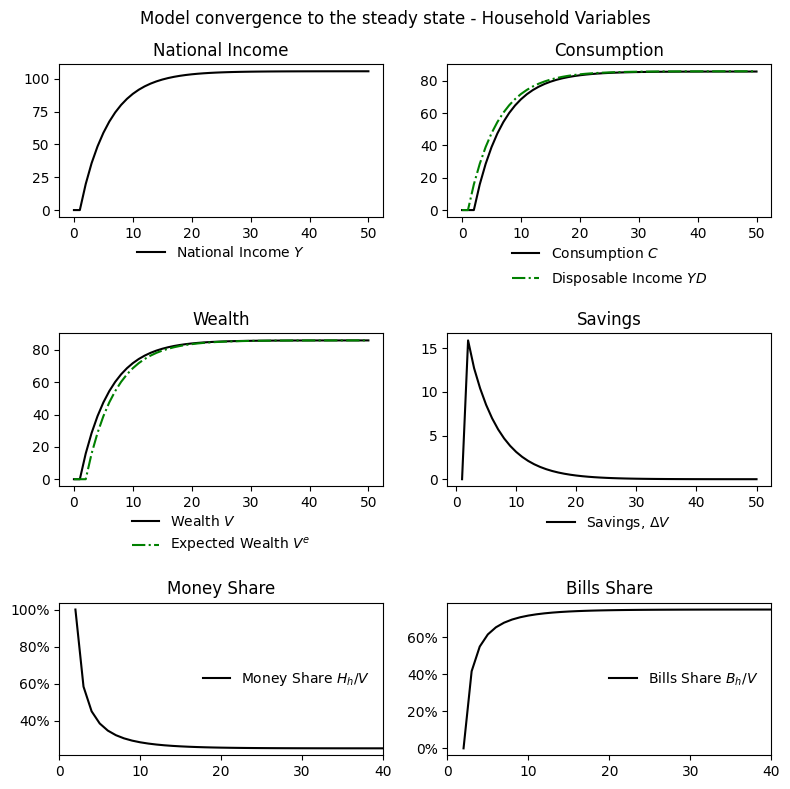

In [4]:
dfo = output.loc[:50]

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(8, 8))

# National Income and Consumption
axs[0,0].plot(dfo.index, dfo['NationalIncome'], color='k', label=r'National Income $Y$')
axs[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[0,0].set_title('National Income')
axs[0,1].plot(dfo.index, dfo['RealConsumptionHousehold'], color='k', label=r'Consumption $C$')
axs[0,1].plot(dfo.index, dfo['DisposableIncome'], color='g', linestyle='-.', label=r'Disposable Income $YD$')
axs[0,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[0,1].set_title('Consumption')

# Wealth and Savings
axs[1,0].plot(dfo.index, dfo['Wealth'], color='k', label=r'Wealth $V$')
axs[1,0].plot(dfo.index, dfo['ExpectedWealth'], color='g', linestyle='-.', label=r'Expected Wealth $V^e$')
axs[1,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[1,0].set_title('Wealth')
axs[1,1].plot(dfo.index, dfo['Wealth'].diff(), color='k', label=r'Savings, $\Delta V$')
axs[1,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[1,1].set_title('Savings')

# Money Share and Bills Share
axs[2,0].plot(dfo.index, dfo['HouseholdMoneyStock'] / dfo['Wealth'], color='k', linestyle='-', label='Money Share $H_h/V$')
axs[2,0].legend(loc='center right', frameon=False)
axs[2,0].set_xlim(0,40)
axs[2,0].set_title('Money Share')
axs[2,0].yaxis.set_major_formatter(PercentFormatter(1))

# Right panel - Bills share
axs[2,1].plot(dfo.index, dfo['HouseholdBillStock'] / dfo['Wealth'], color='k', linestyle='-', label='Bills Share $B_h/V$')
axs[2,1].legend(loc='center right', frameon=False)
axs[2,1].set_xlim(0,40)
axs[2,1].set_title('Bills Share')
axs[2,1].yaxis.set_major_formatter(PercentFormatter(1))


fig.suptitle('Model convergence to the steady state - Household Variables')
plt.tight_layout()
plt.show()


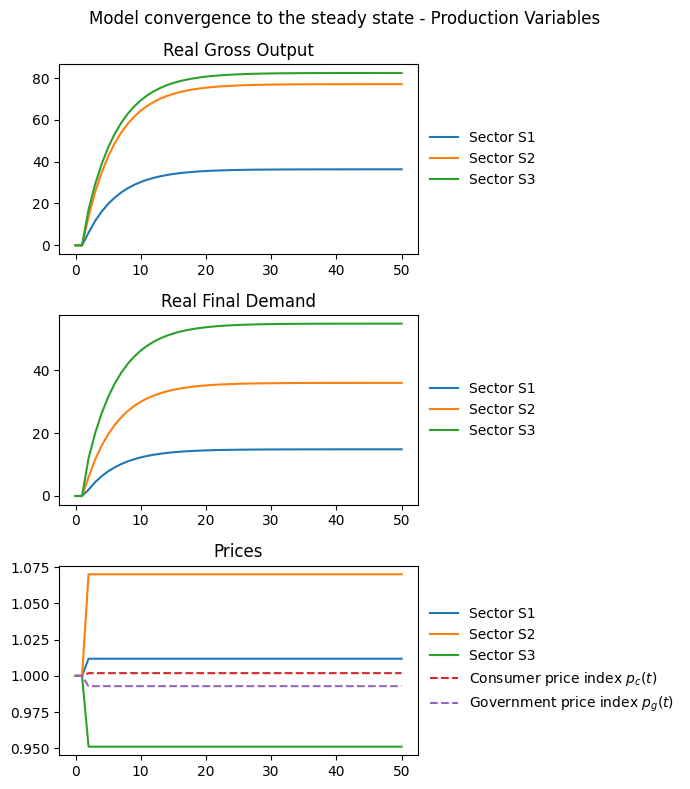

In [5]:
dfo = output.loc[:50]

fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(7, 8))

# National Income and Consumption
for s in dfo["RealGrossOutput"].columns:
    axs[0].plot(dfo.index, dfo['RealGrossOutput'][s], label=f"Sector {s}")
axs[0].set_title('Real Gross Output')

for s in dfo["RealFinalDemand"].columns:
    axs[1].plot(dfo.index, dfo['RealFinalDemand'][s], label=f"Sector {s}")
axs[1].set_title('Real Final Demand')

for s in dfo["Prices"].columns:
    axs[2].plot(dfo.index, dfo['Prices'][s], label=f"Sector {s}")
axs[2].plot(dfo.index, dfo["ConsumerPriceIndex"], linestyle="--", label=f"Consumer price index $p_c(t)$")
axs[2].plot(dfo.index, dfo["GovernmentPriceIndex"], linestyle="--", label=f"Government price index $p_g(t)$")
axs[2].set_title('Prices')

for ax in axs:
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)


fig.suptitle('Model convergence to the steady state - Production Variables')
plt.tight_layout()
plt.show()


/tmp/ipykernel_129515/2998917229.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False)


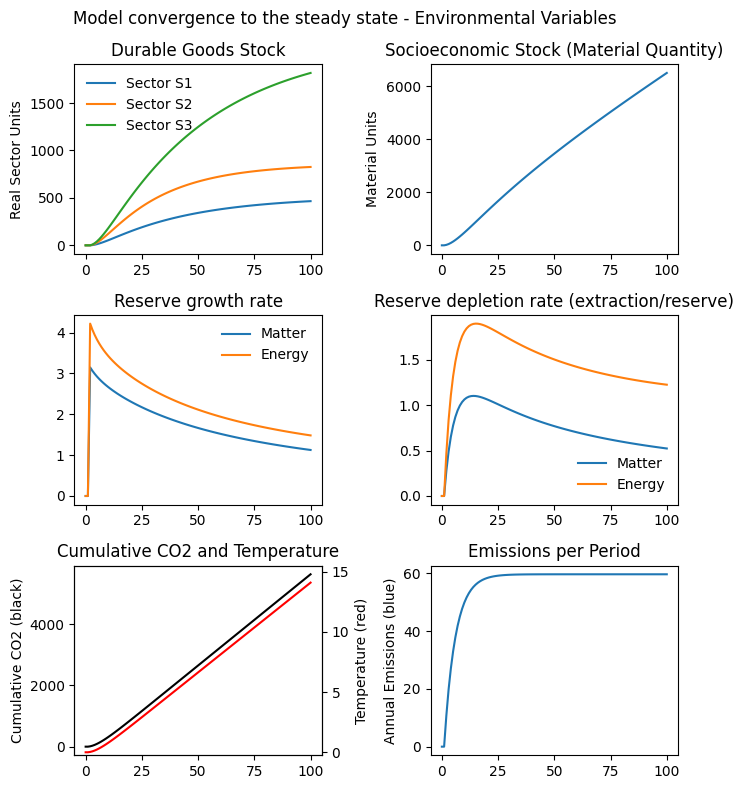

In [6]:
dfo = output

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(7, 8))

axs[0,0].set_title("Durable Goods Stock")
axs[0,0].set_ylabel("Real Sector Units")
for s in dfo["DurableGoodsStock"].columns:
    axs[0,0].plot(dfo.index,dfo["DurableGoodsStock"][s], label=f"Sector {s}")

axs[0,1].set_title("Socioeconomic Stock (Material Quantity)")
axs[0,1].set_ylabel("Material Units")
axs[0,1].plot(dfo.index,dfo["SocioeconomicStock"])

axs[1,0].set_title("Reserve growth rate")
axs[1,0].plot(100 * dfo["ConversionMatterToReserves"] / dfo["MatterReserves"], label="Matter")
axs[1,0].plot(100 * dfo["ConversionEnergyToReserves"] / dfo["EnergyReserves"], label="Energy")

axs[1,1].set_title("Reserve depletion rate (extraction/reserve)")
axs[1,1].plot(100 * dfo["ExtractedMatter"] / dfo["MatterReserves"], label="Matter")
axs[1,1].plot(100 * dfo["EnergyRequiredForProduction"] / dfo["EnergyReserves"], label="Energy")

axs[2,0].set_title("Cumulative CO2 and Temperature")
axs[2,0].set_ylabel("Cumulative CO2 (black)")
axs[2,0].plot(dfo["CumulativeCO2"], color="black")
axs_alt = axs[2,0].twinx()
axs_alt.plot(dfo["Temperature"], color="red")
axs_alt.set_ylabel("Temperature (red)")
axs_alt.set_ylim(-0.25, 1.1 * dfo["Temperature"].max().iloc[0])

axs[2,1].set_title("Emissions per Period")
axs[2,1].plot(dfo["Emissions"])
axs[2,1].set_ylabel("Annual Emissions (blue)")

for ax in axs.flatten():
    ax.legend(frameon=False)

fig.suptitle('Model convergence to the steady state - Environmental Variables')
plt.tight_layout()
plt.show()


### Perturbation 1: An increase of 100 points in the rate of interest on bills ($r$)

Following the convergence to the steady state, we can study the effects of an increase in the rate on bills by 100bps

`MacroStat` is set up to easily handle these scenarios. Much like in prior models, we simply define a new scenario `IncreaseInterestRate` and set the new rate to be 100 points higher $r=0.025+0.01$

In [7]:
model.parameters["scenario_trigger"] = 60
model.scenarios.add_scenario(
    name="IncreaseInterestRate",
    timeseries={"InterestRate":0.025 + 0.01}
)
model.simulate(scenario="IncreaseInterestRate")
output_rate_increase = model.variables.to_pandas()

Now we can see how the model reacts to the shock.

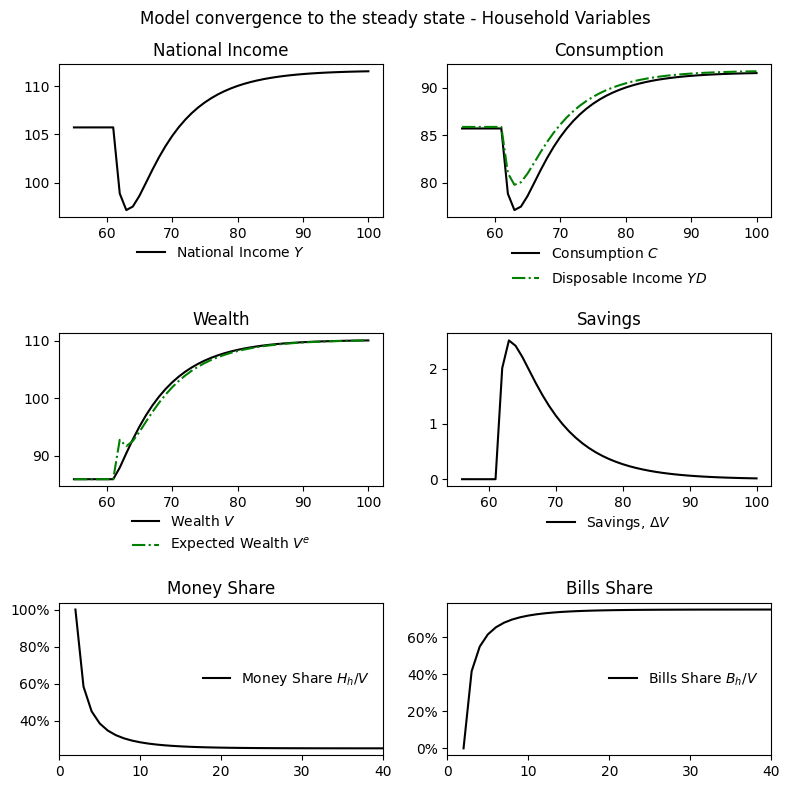

In [8]:
dfo = output_rate_increase.loc[55:]

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(8, 8))

# National Income and Consumption
axs[0,0].plot(dfo.index, dfo['NationalIncome'], color='k', label=r'National Income $Y$')
axs[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[0,0].set_title('National Income')
axs[0,1].plot(dfo.index, dfo['RealConsumptionHousehold'], color='k', label=r'Consumption $C$')
axs[0,1].plot(dfo.index, dfo['DisposableIncome'], color='g', linestyle='-.', label=r'Disposable Income $YD$')
axs[0,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[0,1].set_title('Consumption')

# Wealth and Savings
axs[1,0].plot(dfo.index, dfo['Wealth'], color='k', label=r'Wealth $V$')
axs[1,0].plot(dfo.index, dfo['ExpectedWealth'], color='g', linestyle='-.', label=r'Expected Wealth $V^e$')
axs[1,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[1,0].set_title('Wealth')
axs[1,1].plot(dfo.index, dfo['Wealth'].diff(), color='k', label=r'Savings, $\Delta V$')
axs[1,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[1,1].set_title('Savings')

# Money Share and Bills Share
axs[2,0].plot(output.index, output['HouseholdMoneyStock'] / output['Wealth'], color='k', linestyle='-', label='Money Share $H_h/V$')
axs[2,0].legend(loc='center right', frameon=False)
axs[2,0].set_xlim(0,40)
axs[2,0].set_title('Money Share')
axs[2,0].yaxis.set_major_formatter(PercentFormatter(1))

# Right panel - Bills share
axs[2,1].plot(output.index, output['HouseholdBillStock'] / output['Wealth'], color='k', linestyle='-', label='Bills Share $B_h/V$')
axs[2,1].legend(loc='center right', frameon=False)
axs[2,1].set_xlim(0,40)
axs[2,1].set_title('Bills Share')
axs[2,1].yaxis.set_major_formatter(PercentFormatter(1))


fig.suptitle('Model convergence to the steady state - Household Variables')
plt.tight_layout()
plt.show()


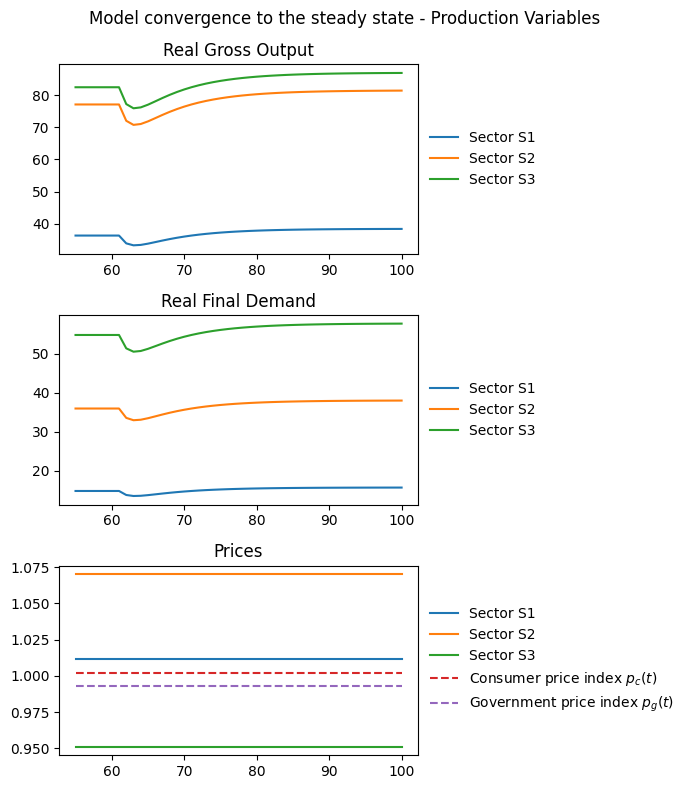

In [9]:
dfo = output_rate_increase.loc[55:]

fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(7, 8))

# National Income and Consumption
for s in dfo["RealGrossOutput"].columns:
    axs[0].plot(dfo.index, dfo['RealGrossOutput'][s], label=f"Sector {s}")
axs[0].set_title('Real Gross Output')

for s in dfo["RealFinalDemand"].columns:
    axs[1].plot(dfo.index, dfo['RealFinalDemand'][s], label=f"Sector {s}")
axs[1].set_title('Real Final Demand')

for s in dfo["Prices"].columns:
    axs[2].plot(dfo.index, dfo['Prices'][s], label=f"Sector {s}")
axs[2].plot(dfo.index, dfo["ConsumerPriceIndex"], linestyle="--", label=f"Consumer price index $p_c(t)$")
axs[2].plot(dfo.index, dfo["GovernmentPriceIndex"], linestyle="--", label=f"Government price index $p_g(t)$")
axs[2].set_title('Prices')

for ax in axs:
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)


fig.suptitle('Model convergence to the steady state - Production Variables')
plt.tight_layout()
plt.show()


/tmp/ipykernel_129515/4078320462.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False)


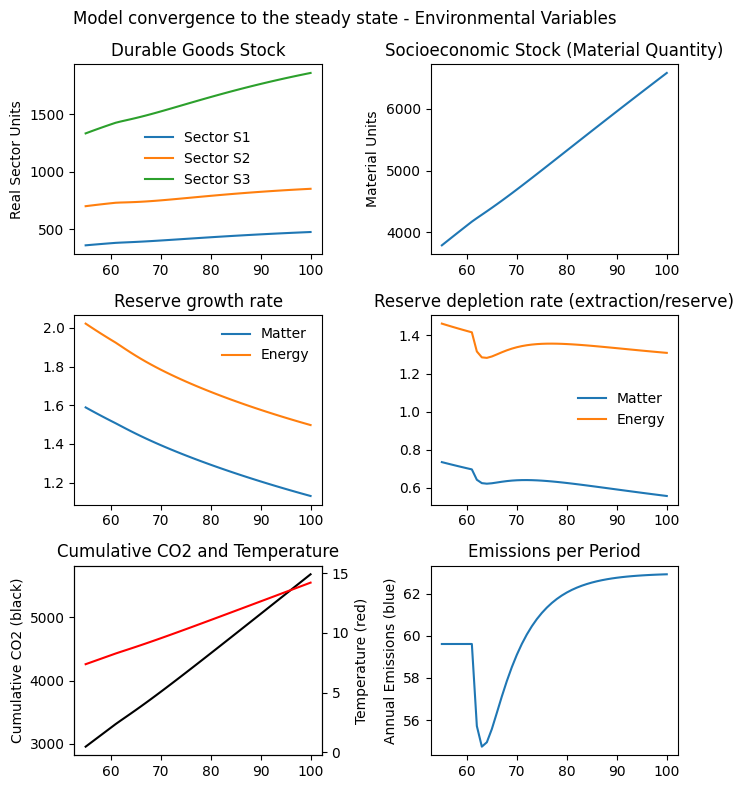

In [10]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(7, 8))

axs[0,0].set_title("Durable Goods Stock")
axs[0,0].set_ylabel("Real Sector Units")
for s in dfo["DurableGoodsStock"].columns:
    axs[0,0].plot(dfo.index,dfo["DurableGoodsStock"][s], label=f"Sector {s}")

axs[0,1].set_title("Socioeconomic Stock (Material Quantity)")
axs[0,1].set_ylabel("Material Units")
axs[0,1].plot(dfo.index,dfo["SocioeconomicStock"])

axs[1,0].set_title("Reserve growth rate")
axs[1,0].plot(100 * dfo["ConversionMatterToReserves"] / dfo["MatterReserves"], label="Matter")
axs[1,0].plot(100 * dfo["ConversionEnergyToReserves"] / dfo["EnergyReserves"], label="Energy")

axs[1,1].set_title("Reserve depletion rate (extraction/reserve)")
axs[1,1].plot(100 * dfo["ExtractedMatter"] / dfo["MatterReserves"], label="Matter")
axs[1,1].plot(100 * dfo["EnergyRequiredForProduction"] / dfo["EnergyReserves"], label="Energy")

axs[2,0].set_title("Cumulative CO2 and Temperature")
axs[2,0].set_ylabel("Cumulative CO2 (black)")
axs[2,0].plot(dfo["CumulativeCO2"], color="black")
axs_alt = axs[2,0].twinx()
axs_alt.plot(dfo["Temperature"], color="red")
axs_alt.set_ylabel("Temperature (red)")
axs_alt.set_ylim(-0.25, 1.1 * dfo["Temperature"].max().iloc[0])

axs[2,1].set_title("Emissions per Period")
axs[2,1].plot(dfo["Emissions"])
axs[2,1].set_ylabel("Annual Emissions (blue)")

for ax in axs.flatten():
    ax.legend(frameon=False)

fig.suptitle('Model convergence to the steady state - Environmental Variables')
plt.tight_layout()
plt.show()


/tmp/ipykernel_129515/2998917229.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False)


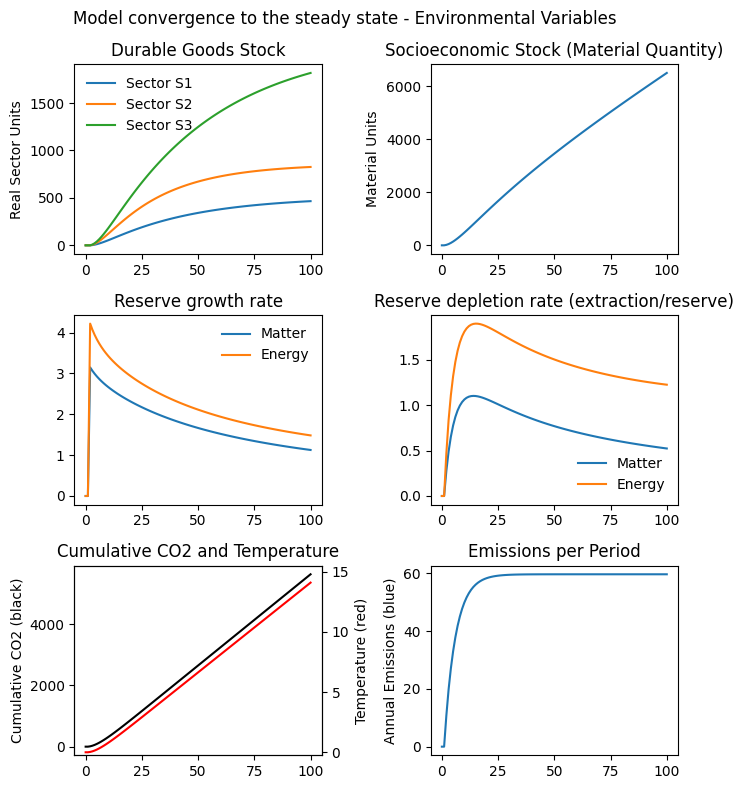

In [11]:
dfo = output

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(7, 8))

axs[0,0].set_title("Durable Goods Stock")
axs[0,0].set_ylabel("Real Sector Units")
for s in dfo["DurableGoodsStock"].columns:
    axs[0,0].plot(dfo.index,dfo["DurableGoodsStock"][s], label=f"Sector {s}")

axs[0,1].set_title("Socioeconomic Stock (Material Quantity)")
axs[0,1].set_ylabel("Material Units")
axs[0,1].plot(dfo.index,dfo["SocioeconomicStock"])

axs[1,0].set_title("Reserve growth rate")
axs[1,0].plot(100 * dfo["ConversionMatterToReserves"] / dfo["MatterReserves"], label="Matter")
axs[1,0].plot(100 * dfo["ConversionEnergyToReserves"] / dfo["EnergyReserves"], label="Energy")

axs[1,1].set_title("Reserve depletion rate (extraction/reserve)")
axs[1,1].plot(100 * dfo["ExtractedMatter"] / dfo["MatterReserves"], label="Matter")
axs[1,1].plot(100 * dfo["EnergyRequiredForProduction"] / dfo["EnergyReserves"], label="Energy")

axs[2,0].set_title("Cumulative CO2 and Temperature")
axs[2,0].set_ylabel("Cumulative CO2 (black)")
axs[2,0].plot(dfo["CumulativeCO2"], color="black")
axs_alt = axs[2,0].twinx()
axs_alt.plot(dfo["Temperature"], color="red")
axs_alt.set_ylabel("Temperature (red)")
axs_alt.set_ylim(-0.25, 1.1 * dfo["Temperature"].max().iloc[0])

axs[2,1].set_title("Emissions per Period")
axs[2,1].plot(dfo["Emissions"])
axs[2,1].set_ylabel("Annual Emissions (blue)")

for ax in axs.flatten():
    ax.legend(frameon=False)

fig.suptitle('Model convergence to the steady state - Environmental Variables')
plt.tight_layout()
plt.show()


### Perturbation 2: An increate in government spending

In [12]:
model.parameters["scenario_trigger"] = 60
model.scenarios.add_scenario(
    name="GovSpending",
    timeseries={"GovernmentDemand":25}
)
model.simulate(scenario="GovSpending")
output= model.variables.to_pandas()
dfo = output.loc[55:]

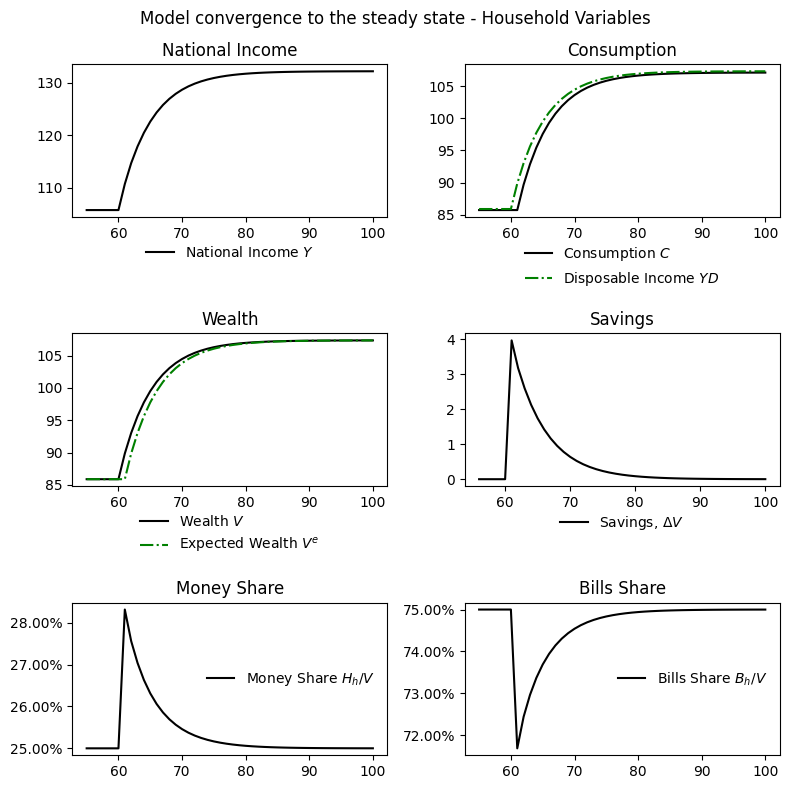

In [13]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(8, 8))

# National Income and Consumption
axs[0,0].plot(dfo.index, dfo['NationalIncome'], color='k', label=r'National Income $Y$')
axs[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[0,0].set_title('National Income')
axs[0,1].plot(dfo.index, dfo['RealConsumptionHousehold'], color='k', label=r'Consumption $C$')
axs[0,1].plot(dfo.index, dfo['DisposableIncome'], color='g', linestyle='-.', label=r'Disposable Income $YD$')
axs[0,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[0,1].set_title('Consumption')

# Wealth and Savings
axs[1,0].plot(dfo.index, dfo['Wealth'], color='k', label=r'Wealth $V$')
axs[1,0].plot(dfo.index, dfo['ExpectedWealth'], color='g', linestyle='-.', label=r'Expected Wealth $V^e$')
axs[1,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[1,0].set_title('Wealth')
axs[1,1].plot(dfo.index, dfo['Wealth'].diff(), color='k', label=r'Savings, $\Delta V$')
axs[1,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[1,1].set_title('Savings')

# Money Share and Bills Share
axs[2,0].plot(dfo.index, dfo['HouseholdMoneyStock'] / dfo['Wealth'], color='k', linestyle='-', label='Money Share $H_h/V$')
axs[2,0].legend(loc='center right', frameon=False)
axs[2,0].set_title('Money Share')
axs[2,0].yaxis.set_major_formatter(PercentFormatter(1))

# Right panel - Bills share
axs[2,1].plot(dfo.index, dfo['HouseholdBillStock'] / dfo['Wealth'], color='k', linestyle='-', label='Bills Share $B_h/V$')
axs[2,1].legend(loc='center right', frameon=False)
axs[2,1].set_title('Bills Share')
axs[2,1].yaxis.set_major_formatter(PercentFormatter(1))


fig.suptitle('Model convergence to the steady state - Household Variables')
plt.tight_layout()
plt.show()


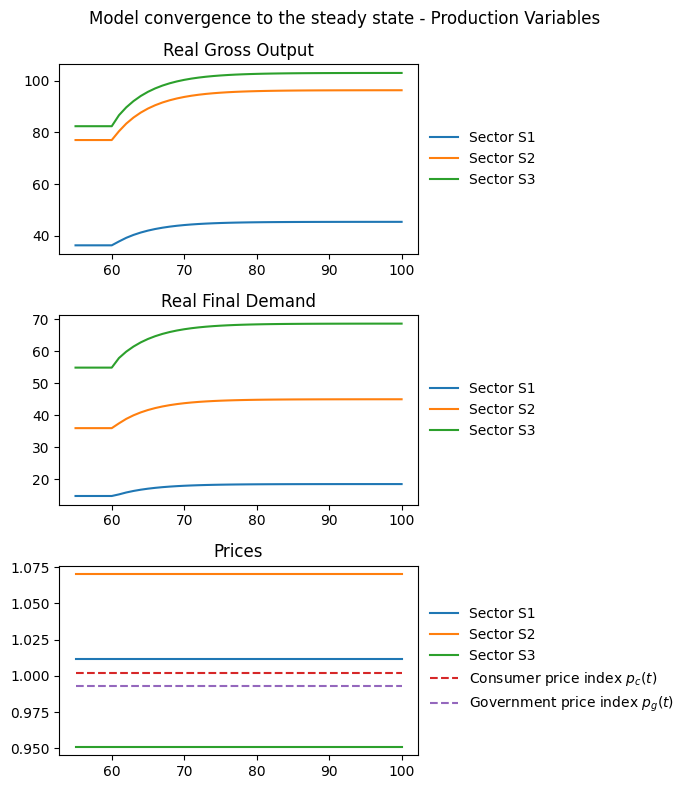

In [14]:
fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(7, 8))

# National Income and Consumption
for s in dfo["RealGrossOutput"].columns:
    axs[0].plot(dfo.index, dfo['RealGrossOutput'][s], label=f"Sector {s}")
axs[0].set_title('Real Gross Output')

for s in dfo["RealFinalDemand"].columns:
    axs[1].plot(dfo.index, dfo['RealFinalDemand'][s], label=f"Sector {s}")
axs[1].set_title('Real Final Demand')

for s in dfo["Prices"].columns:
    axs[2].plot(dfo.index, dfo['Prices'][s], label=f"Sector {s}")
axs[2].plot(dfo.index, dfo["ConsumerPriceIndex"], linestyle="--", label=f"Consumer price index $p_c(t)$")
axs[2].plot(dfo.index, dfo["GovernmentPriceIndex"], linestyle="--", label=f"Government price index $p_g(t)$")
axs[2].set_title('Prices')

for ax in axs:
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)


fig.suptitle('Model convergence to the steady state - Production Variables')
plt.tight_layout()
plt.show()


/tmp/ipykernel_129515/4078320462.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False)


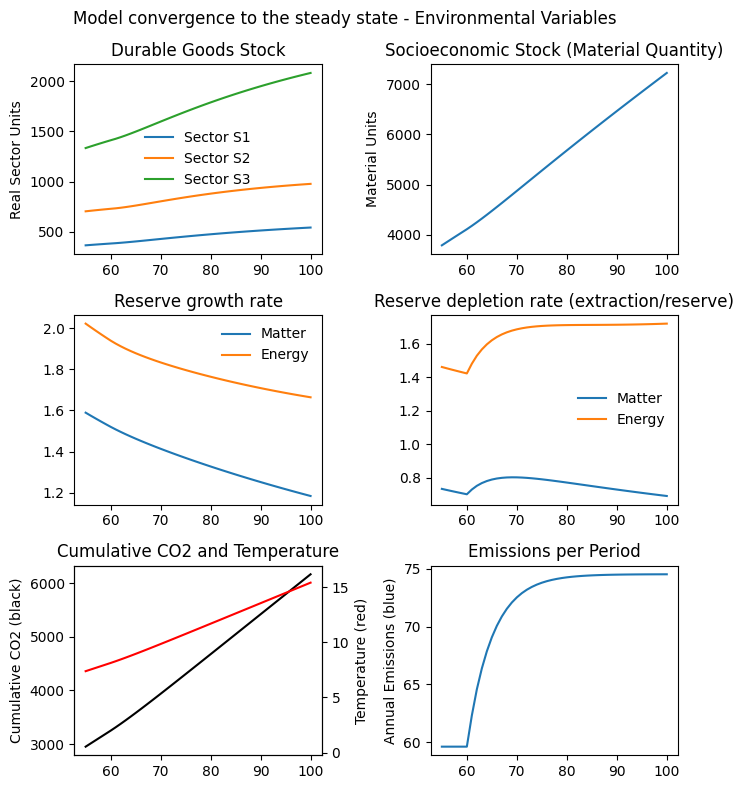

In [15]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(7, 8))

axs[0,0].set_title("Durable Goods Stock")
axs[0,0].set_ylabel("Real Sector Units")
for s in dfo["DurableGoodsStock"].columns:
    axs[0,0].plot(dfo.index,dfo["DurableGoodsStock"][s], label=f"Sector {s}")

axs[0,1].set_title("Socioeconomic Stock (Material Quantity)")
axs[0,1].set_ylabel("Material Units")
axs[0,1].plot(dfo.index,dfo["SocioeconomicStock"])

axs[1,0].set_title("Reserve growth rate")
axs[1,0].plot(100 * dfo["ConversionMatterToReserves"] / dfo["MatterReserves"], label="Matter")
axs[1,0].plot(100 * dfo["ConversionEnergyToReserves"] / dfo["EnergyReserves"], label="Energy")

axs[1,1].set_title("Reserve depletion rate (extraction/reserve)")
axs[1,1].plot(100 * dfo["ExtractedMatter"] / dfo["MatterReserves"], label="Matter")
axs[1,1].plot(100 * dfo["EnergyRequiredForProduction"] / dfo["EnergyReserves"], label="Energy")

axs[2,0].set_title("Cumulative CO2 and Temperature")
axs[2,0].set_ylabel("Cumulative CO2 (black)")
axs[2,0].plot(dfo["CumulativeCO2"], color="black")
axs_alt = axs[2,0].twinx()
axs_alt.plot(dfo["Temperature"], color="red")
axs_alt.set_ylabel("Temperature (red)")
axs_alt.set_ylim(-0.25, 1.1 * dfo["Temperature"].max().iloc[0])

axs[2,1].set_title("Emissions per Period")
axs[2,1].plot(dfo["Emissions"])
axs[2,1].set_ylabel("Annual Emissions (blue)")

for ax in axs.flatten():
    ax.legend(frameon=False)

fig.suptitle('Model convergence to the steady state - Environmental Variables')
plt.tight_layout()
plt.show()


/tmp/ipykernel_129515/4078320462.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False)


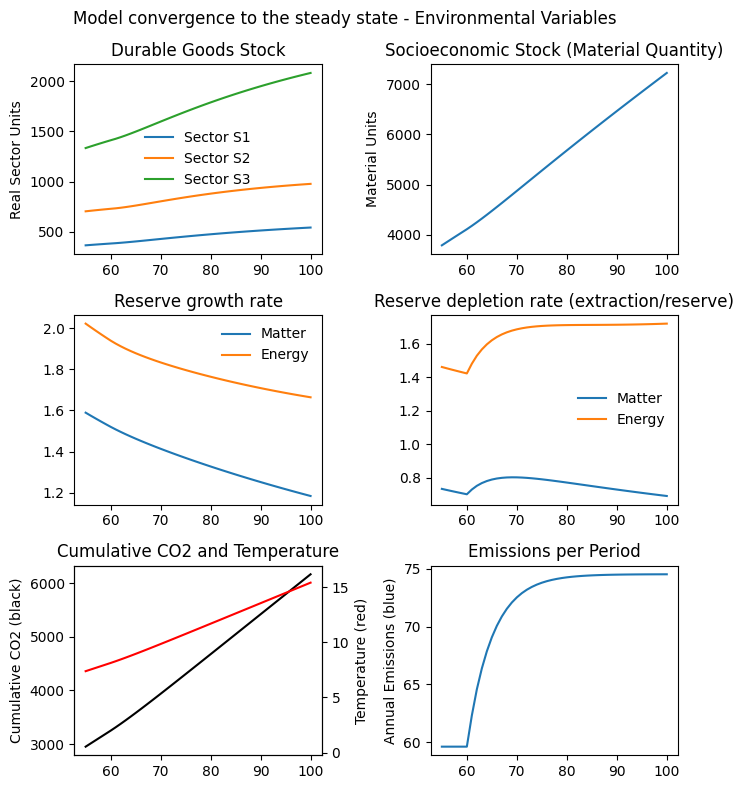

In [16]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(7, 8))

axs[0,0].set_title("Durable Goods Stock")
axs[0,0].set_ylabel("Real Sector Units")
for s in dfo["DurableGoodsStock"].columns:
    axs[0,0].plot(dfo.index,dfo["DurableGoodsStock"][s], label=f"Sector {s}")

axs[0,1].set_title("Socioeconomic Stock (Material Quantity)")
axs[0,1].set_ylabel("Material Units")
axs[0,1].plot(dfo.index,dfo["SocioeconomicStock"])

axs[1,0].set_title("Reserve growth rate")
axs[1,0].plot(100 * dfo["ConversionMatterToReserves"] / dfo["MatterReserves"], label="Matter")
axs[1,0].plot(100 * dfo["ConversionEnergyToReserves"] / dfo["EnergyReserves"], label="Energy")

axs[1,1].set_title("Reserve depletion rate (extraction/reserve)")
axs[1,1].plot(100 * dfo["ExtractedMatter"] / dfo["MatterReserves"], label="Matter")
axs[1,1].plot(100 * dfo["EnergyRequiredForProduction"] / dfo["EnergyReserves"], label="Energy")

axs[2,0].set_title("Cumulative CO2 and Temperature")
axs[2,0].set_ylabel("Cumulative CO2 (black)")
axs[2,0].plot(dfo["CumulativeCO2"], color="black")
axs_alt = axs[2,0].twinx()
axs_alt.plot(dfo["Temperature"], color="red")
axs_alt.set_ylabel("Temperature (red)")
axs_alt.set_ylim(-0.25, 1.1 * dfo["Temperature"].max().iloc[0])

axs[2,1].set_title("Emissions per Period")
axs[2,1].plot(dfo["Emissions"])
axs[2,1].set_ylabel("Annual Emissions (blue)")

for ax in axs.flatten():
    ax.legend(frameon=False)

fig.suptitle('Model convergence to the steady state - Environmental Variables')
plt.tight_layout()
plt.show()
